# Predicting Diabetes and Identifying Important Health Indicators: Data Cleaning and Descriptive Statistics

## Importing Python libraries and the Initial Dataset

### Importing Python libraries

In [36]:
#pip install pandas
#pip install numpy==2.0
#pip install --upgrade ydata-profiling
#%pip install scikit-learn
#%pip install mlxtend

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from IPython.display import IFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
import tqdm as notebook_tqdm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


### Importing the dataset from desktop folder

In [2]:
def read_csv_file(file_path):
    """
    Read a CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    return df

# Specify the file path
file_path = 'C:/Users/steph/OneDrive/Desktop/Diabetes/archive/diabetes_012_health_indicators_BRFSS2015.csv'

# Read the CSV file into a pandas DataFrame
df = read_csv_file(file_path)

# Display the DataFrame
display(df.head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Generating Exploratory Data Analysis (EDA) Report

In [4]:
#profile = ProfileReport(df, title='Exploratory Analysis Report')
#profile.to_file('exploratory_analysis_report.html')

In [5]:
#IFrame('exploratory_analysis_report.html', width=800, height=600)

## Data Cleaning and Preprocessing

### Checking and handling missing values

In [6]:
#Check for missing values: 
missing_values = df.isnull().sum()
missing_values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no missing values in this dataset. 

## Checking and handling duplicates

In [7]:
#Check for duplicate records:
duplicate_records = df.duplicated().sum()
duplicate_records

np.int64(23899)

In [8]:
#Check the percentage of the dataset which consists of duplicate records
duplicate_records = df.duplicated().sum()
total_records = df.shape[0]
percentage_duplicate_records = (duplicate_records / total_records) * 100
percentage_duplicate_records

np.float64(9.42092399873857)

Although there are no individual IDs attached to each entry, further evaluation of the dataset reveals that duplicate records may represent valid reoccurrences of individual combinations of diabetes diagnosis and health indicators. These reoccurrences could be meaningful during the future evaluation of frequency item sets. No changes will be made to the duplicates at this time, however, duplicates will be aggregated before the implementation of machine learning for predictive modeling since many of these algorithms are sensitive to duplicates which could create biased results. 

## Standardizing and transforming data types

In [9]:
#Check data type of each column
data_types = df.dtypes
data_types

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [10]:
#Convert data to appropriate types

#Define nominal YES/NO columns to convert to category type
nominal_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
#Convert nominal columns to category type
# Convert each nominal column to categorical type
for column in nominal_columns:
    df[column] = pd.Categorical(df[column], 
                                 categories=[0, 1], 
                                 ordered=False)

#Define FEMALE/MALE categories and labels and convert to category type
df['Sex'] = pd.Categorical(df['Sex'], 
    categories=[0,1], 
    ordered=False
)

#Define discrete columns to convert to integer type
discrete_columns = ['MentHlth', 'PhysHlth']
#Convert discrete columns to integer type
df[discrete_columns] = df[discrete_columns].astype('int')

# Define ordinal categories with labels and convert to category type
df['Diabetes_012'] = pd.Categorical(df['Diabetes_012'], 
    categories=[0, 1, 2], 
    ordered=True
)

df['GenHlth'] = pd.Categorical(df['GenHlth'], 
    categories=[1, 2, 3, 4, 5], 
    ordered=True
)

df['Age'] = pd.Categorical(df['Age'], 
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
    ordered=True
)

df['Education'] = pd.Categorical(df['Education'], 
    categories=[1, 2, 3, 4, 5, 6], 
    ordered=True
)

df['Income'] = pd.Categorical(df['Income'], 
    categories=[1, 2, 3, 4, 5, 6, 7, 8], 
    ordered=True
)

In [11]:
#check data types
data_types = df.dtypes
data_types

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

In [12]:
#Check head of dataframe for consistency
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [13]:
#Save cleaned df as .csv file
df.to_csv('C:/Users/steph/OneDrive/Desktop/Diabetes/archive/diabetes_012_health_indicators_BRFSS2015_cleaned.csv', index=False)

## Descriptive Statistics 

In [14]:
#Rename the categories for descriptive statistics
df['HighBP'] = df['HighBP'].cat.rename_categories(['No', 'Yes'])
df['HighChol'] = df['HighChol'].cat.rename_categories(['No', 'Yes'])
df['CholCheck'] = df['CholCheck'].cat.rename_categories(['No', 'Yes'])
df['Smoker'] = df['Smoker'].cat.rename_categories(['No', 'Yes'])
df['Stroke'] = df['Stroke'].cat.rename_categories(['No', 'Yes'])
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].cat.rename_categories(['No', 'Yes'])
df['PhysActivity'] = df['PhysActivity'].cat.rename_categories(['No', 'Yes'])
df['Fruits'] = df['Fruits'].cat.rename_categories(['No', 'Yes'])
df['Veggies'] = df['Veggies'].cat.rename_categories(['No', 'Yes'])
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].cat.rename_categories(['No', 'Yes'])
df['AnyHealthcare'] = df['AnyHealthcare'].cat.rename_categories(['No', 'Yes'])
df['NoDocbcCost'] = df['NoDocbcCost'].cat.rename_categories(['No', 'Yes'])
df['DiffWalk'] = df['DiffWalk'].cat.rename_categories(['No', 'Yes'])
df['Sex'] = df['Sex'].cat.rename_categories(['Female', 'Male'])
df['Diabetes_012'] = df['Diabetes_012'].cat.rename_categories(['No Diabetes/Pregnancy only', 'Pre-Diabetes', 'Diabetes'])
df['GenHlth'] = df['GenHlth'].cat.rename_categories(['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
df['Age'] = df['Age'].cat.rename_categories(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])
df['Education'] = df['Education'].cat.rename_categories(['Never attended school or only kindergarten', 'Elementary', 'Some high school', 'High school graduate', 'Some college or technical school', 'College graduate'])
df['Income'] = df['Income'].cat.rename_categories(['less than $10,000', '$10,000 to $15,000', '$15,000 to less than $20,000', '$20,000 to $25,000', '$25,000 to $35,000', '$35,000 to $50,000', '$50,000 to $75,000', '$75,000 or more'])

In [15]:
#Check head of dataframe for consistency
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes/Pregnancy only,Yes,Yes,Yes,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18,15,Yes,Female,60-64,High school graduate,"$15,000 to less than $20,000"
1,No Diabetes/Pregnancy only,No,No,No,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,50-54,College graduate,"less than $10,000"
2,No Diabetes/Pregnancy only,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30,30,Yes,Female,60-64,High school graduate,"$75,000 or more"
3,No Diabetes/Pregnancy only,Yes,No,Yes,27.0,No,No,No,Yes,Yes,...,Yes,No,Very good,0,0,No,Female,70-74,Some high school,"$35,000 to $50,000"
4,No Diabetes/Pregnancy only,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,...,Yes,No,Very good,3,0,No,Female,70-74,Some college or technical school,"$20,000 to $25,000"


### Checking for class imbalance of target variable

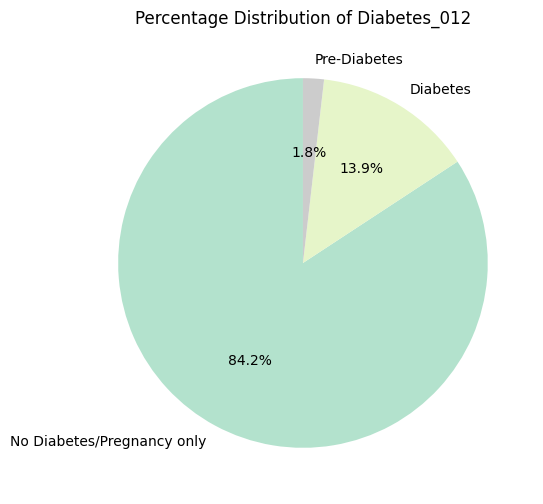

In [16]:
#Chart frequency distribution of target variable 'Diabetes_012' using pie chart
plt.figure(figsize=(12, 6))
df['Diabetes_012'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel2')
plt.title('Percentage Distribution of Diabetes_012')
plt.ylabel('')
plt.show()



It can be concluded that the target variable has a large class imbalance. The data will need to be balanced prior to the application of select machine learning algorithms to limit bias towards majority class and avoid overfitting.

### Checking for outliers

Outliers for categorical data checked based on frequency, relevance, and any deviation from the range of responses. The frequency distribution for each variable can be found in the generated EDA Report. Based on findings in the report, further visualizations for select variables will be analysed hear. 

In [17]:
# Check for outliers by calculating the z score for bmi column
z = np.abs(stats.zscore(df['BMI']))
threshold = 3
outliers = np.where(z > threshold)
outliers

(array([   201,    203,    417, ..., 253316, 253330, 253402]),)

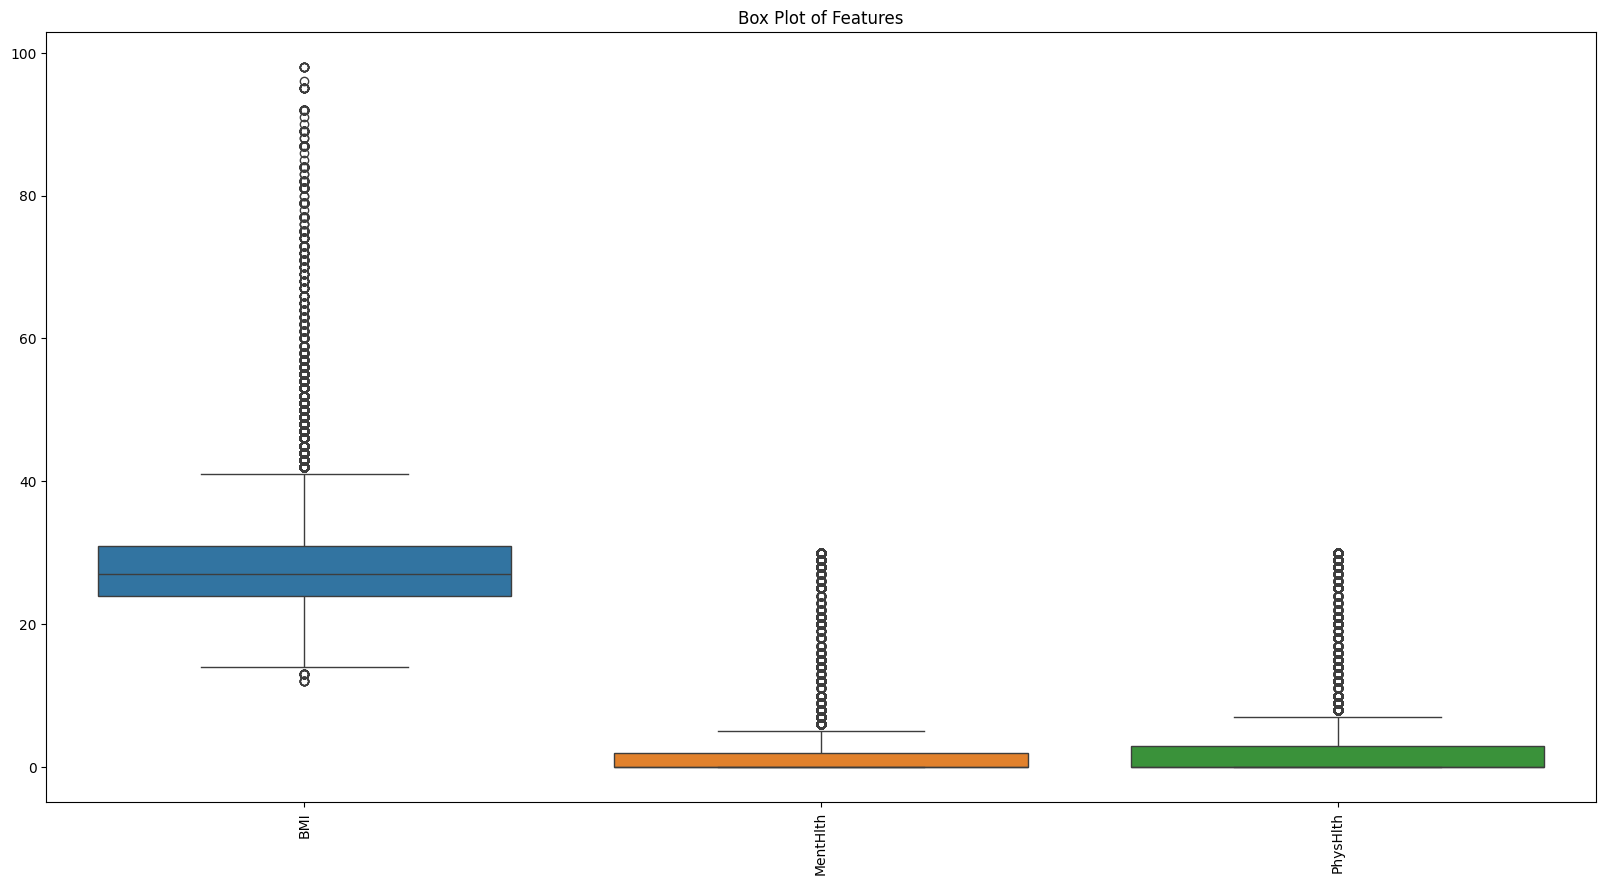

In [18]:
#Visualize outliers for BMI, MentHlth and PhysHtlth columns using box plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
sns.set_palette('Set2')
plt.xticks(rotation=90)
plt.title('Box Plot of Features')

plt.show()

In [19]:
# Check range value for BMI column
min_bmi = df['BMI'].min()
max_bmi = df['BMI'].max()
print(min_bmi)
print(max_bmi)

#Check max value for MentHlth column
max_menthlth = df['MentHlth'].max()
print(max_menthlth)

#Check max value for PhysHlth column
max_physhlth = df['PhysHlth'].max()
print(max_physhlth)


12.0
98.0
30
30


Boxplots show many outliers for BMI, MentHlth, and PhysHlth variables. While these outliers are outside of the normal distribution, they represent legitimate values that may be relevant to the analysis. BMI values range between 12 and 98. The values below 16.5 represent severe underweight and the values above 40 represent severe and extreme obesity, which are still possible. Although represented as outliers here, MentHlth and PhysHlth values remain between the 1 - 30 day range. It is important to note that some machine learning algorithms may however be sensitive to outliers. If this seems to be the case during analysis, the outliers could be capped at the 95th percentile.  

## Descriptive Statistics of Variables of Interest 

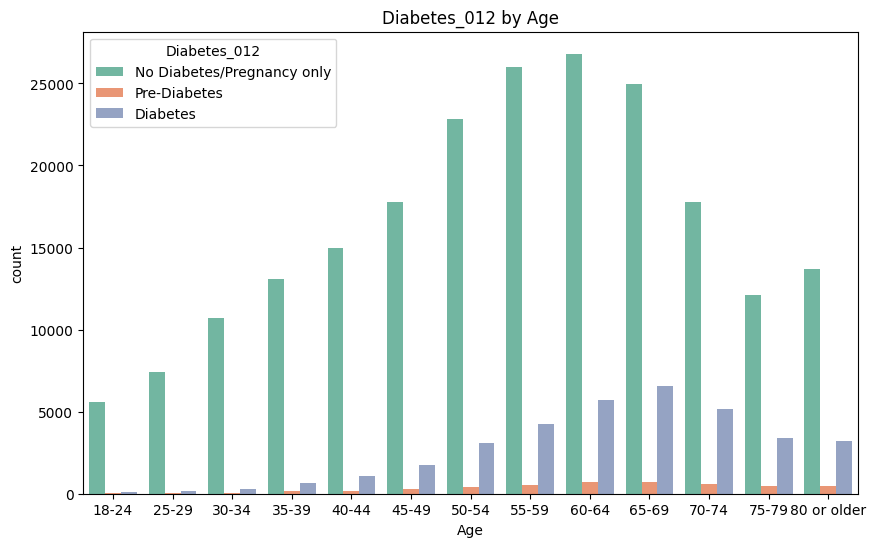

In [20]:
# Set the width and height of the plot
plt.figure(figsize=(10,6))

# Create a count plot of 'Diabetes_012' grouped by 'Age' labels
sns.countplot(data=df, x='Age', hue='Diabetes_012')
sns.set_palette('Set2')
plt.title('Diabetes_012 by Age')

# Display the plot
plt.show()


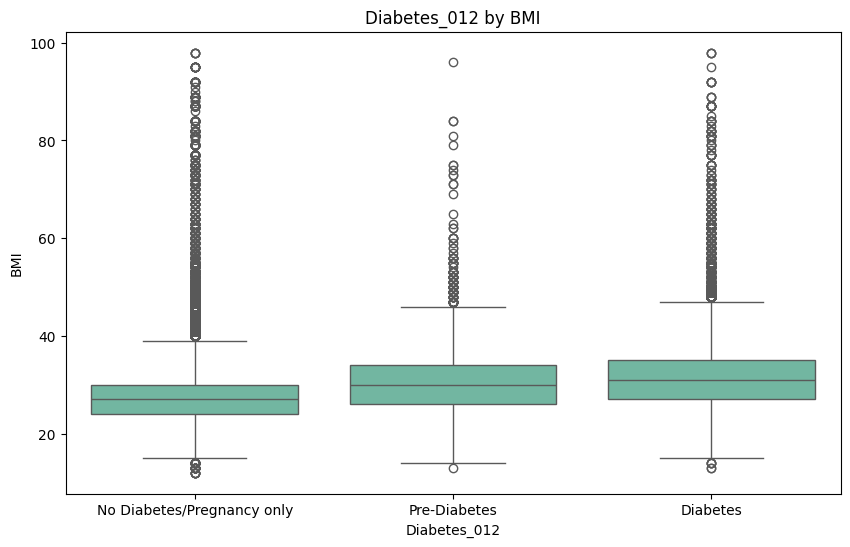

In [21]:
#Plot Diabetes_012 by BMI   
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
sns.set_palette('Set2')
plt.title('Diabetes_012 by BMI')
plt.show()

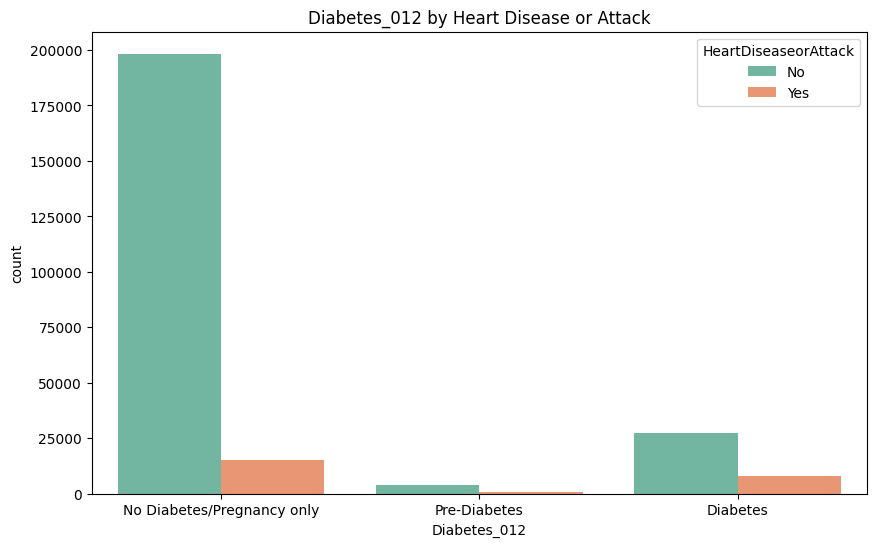

In [22]:
#Plot correlation between diabetes and heart disease or attack
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Diabetes_012', hue='HeartDiseaseorAttack')
sns.set_palette('Set2')
plt.title('Diabetes_012 by Heart Disease or Attack')
plt.show()


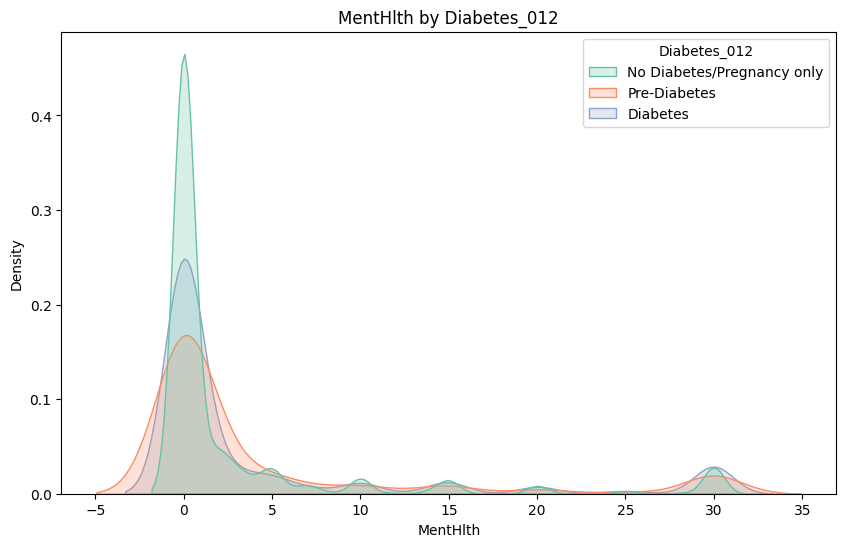

In [23]:
#Grouped kernal density plot of 'MentHlth' by 'Diabetes_012' category
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='MentHlth', hue='Diabetes_012', fill=True, common_norm=False)
sns.set_palette('Set2')
plt.title('MentHlth by Diabetes_012')
plt.show()


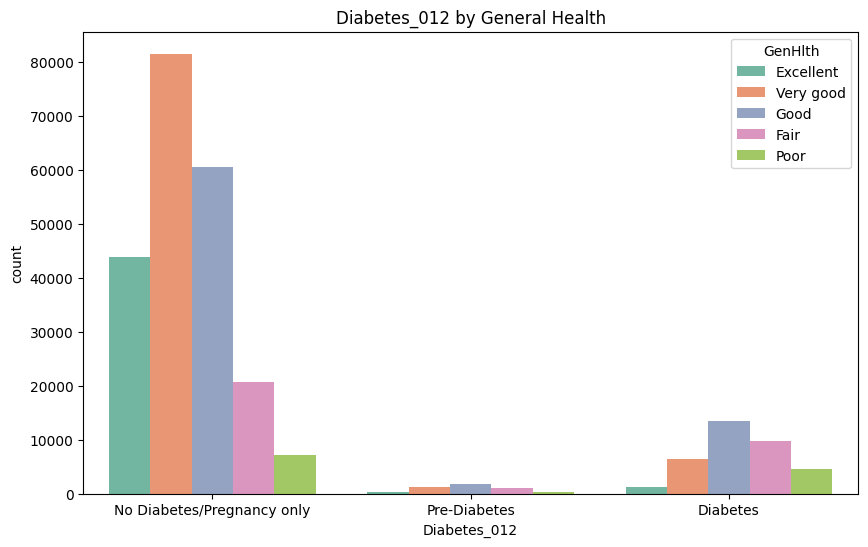

In [24]:
#Plot diabetes by general health
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Diabetes_012', hue='GenHlth')
sns.set_palette('Set2')
plt.title('Diabetes_012 by General Health')
plt.show()

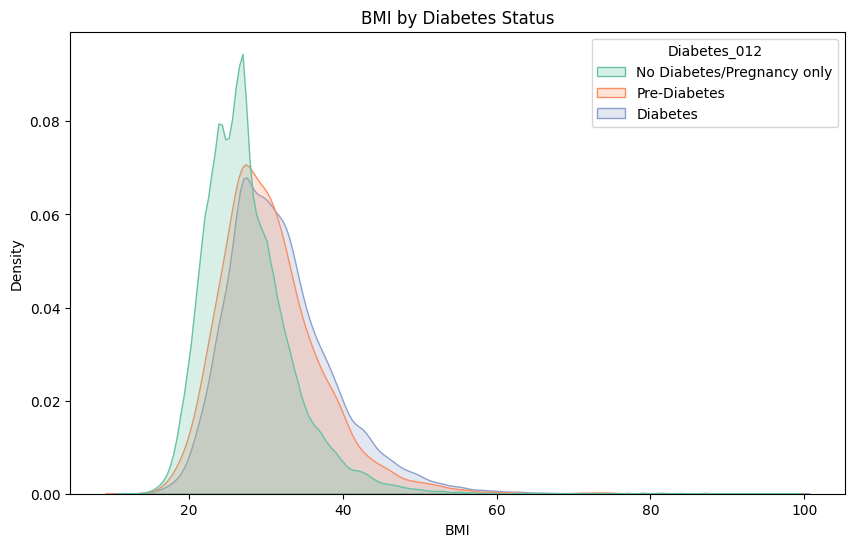

In [25]:
#Grouped kernal density plot of 'BMI' by 'Diabetes_012' category
# Set the width and height of the plot
plt.figure(figsize=(10,6))

# Create a grouped kde plot of 'BMI' grouped by 'Diabetes_012'
sns.kdeplot(data=df, x='BMI', hue='Diabetes_012', fill=True, common_norm=False)

# Add labels to the plot
plt.title('BMI by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')

# Display the plot
plt.show()

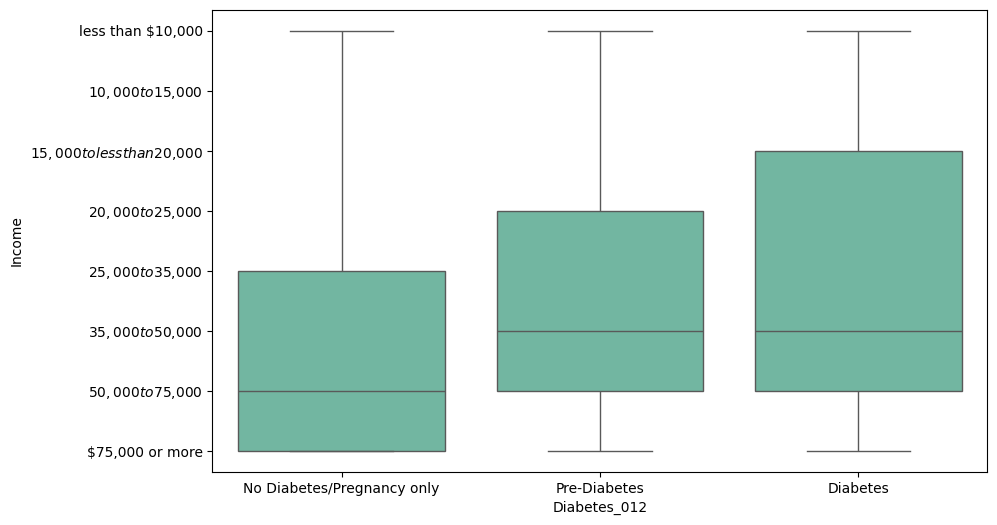

In [26]:
#Plot median income bracket for each 'Diabetes_012' category
# Set the width and height of the plot
plt.figure(figsize=(10,6))

# Create a box plot of 'Education' grouped by 'Diabetes_012'
sns.boxplot(data=df, x='Diabetes_012', y='Income')
sns.set_palette('Set2')

# Display the plot
plt.show()




In [27]:
# Perform ANOVA test to determine if there is a significant difference in BMI between the different diabetes categories
# Define the different diabetes categories
diabetes_categories = df['Diabetes_012'].unique()

# Create an empty list to store the BMI values for each diabetes category
bmi_by_diabetes_category = []

# Iterate over the diabetes categories
for category in diabetes_categories:
    # Get the BMI values for the current category
    bmi_values = df[df['Diabetes_012'] == category]['BMI']
    
    # Append the BMI values to the list
    bmi_by_diabetes_category.append(bmi_values)

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*bmi_by_diabetes_category)
print('F-statistic:', f_statistic)
print('P-value:', p_value)


F-statistic: 6768.361066999286
P-value: 0.0


The large F statistic indicates larger variability between the group means than within the groups and the low p value (below 0.05) indicates a significant difference.

In [28]:
# Perform the Tukey HSD test post-hoc test to determine which diabetes categories have significantly different BMI values
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Flatten the list of BMI values for each diabetes category
bmi_values = [bmi for bmi_category in bmi_by_diabetes_category for bmi in bmi_category]

# Create a list of the diabetes category labels corresponding to the BMI values
diabetes_labels = [category for category in diabetes_categories for _ in range(len(df[df['Diabetes_012'] == category]))]

# Perform the Tukey HSD test
tukey_results = pairwise_tukeyhsd(bmi_values, diabetes_labels, 0.05)
print(tukey_results)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------------------
                  Diabetes No Diabetes/Pregnancy only  -4.2015   0.0 -4.2881 -4.1148   True
                  Diabetes               Pre-Diabetes  -1.2195   0.0 -1.4554 -0.9837   True
No Diabetes/Pregnancy only               Pre-Diabetes   2.9819   0.0  2.7578  3.2061   True
-------------------------------------------------------------------------------------------


We can conclude that the mean between all group comparisons is statistically significant with a p value lower than 0.05. The Diabetes and No Diabetes/Pregnancy groups have the greatest difference in means with the mean of No  Diabetes/Pregnancy only being greater than that of Diabetes. 

In [29]:
# Perform Chi square test between age and diabetes
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['Age'], df['Diabetes_012'])

# Perform the chi-square test
chi2_statistic, p_value, dof, expected_frequencies = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_statistic)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:')
print(expected_frequencies)


Chi-square statistic: 9641.376530679845
P-value: 0.0
Degrees of freedom: 24
Expected frequencies:
[[ 4801.74668874   104.0551088    794.19820246]
 [ 6400.64409492   138.7036345   1058.65227058]
 [ 9370.14533664   203.05350442  1549.80115894]
 [11644.65692605   252.34276648  1926.00030747]
 [13610.84583333   294.95059524  2251.20357143]
 [16695.75747792   361.80143882  2761.44108325]
 [22167.22146799   480.369497    3666.409035  ]
 [25973.23752759   562.84686219  4295.91561022]
 [28005.13454746   606.87860296  4631.98684957]
 [27120.60226269   587.71055661  4485.6871807 ]
 [19824.47453091   429.60155708  3278.92391202]
 [13461.73896247   291.71941028  2226.54162725]
 [14626.79434327   316.96646563  2419.23919111]]


The large chi square statistic indicates there is a greater discrepency between the observed and the expected frequecies, suggesting a stronger association. The p value is bellow 0.05 suggesting the results are statistically significant. 

In [30]:
# Perform kriskal wallis test to determine if there is a significant difference in MentHlth between the different diabetes categories
# Define the different diabetes categories
diabetes_categories = df['Diabetes_012'].unique()

# Create an empty list to store the MentHlth values for each diabetes category
menthlth_by_diabetes_category = []

# Iterate over the diabetes categories
for category in diabetes_categories:
    # Get the MentHlth values for the current category
    menthlth_values = df[df['Diabetes_012'] == category]['MentHlth']
    
    # Append the MentHlth values to the list
    menthlth_by_diabetes_category.append(menthlth_values)

# Perform the Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*menthlth_by_diabetes_category)
print('H-statistic:', h_statistic)
print('P-value:', p_value)



H-statistic: 528.9105731476886
P-value: 1.4077590593485824e-115


### Turning numerical features to categorical prior to applying Chi-Square

In [31]:
#Dividing BMI into 6 categories based on CDC guidelines: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html
#Where 1 = 'Underweight', 2= 'Healthy weight', 3= 'Overweight', 4= 'Class 1 Obesity', 5 = 'Class 2 Obesity', 6 = 'Class 3 Obesity'])
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.4, 24.9, 29.9, 34.9, 39.9, 100], labels=[1, 2, 3, 4, 5, 6])

# Dividing MentHlth into 7 categories where the first category is for containing 0 only and the last category goes up to 30
# Where 0 = '0', 1 = '1-5', 2 ='6-10', 3 = '11-15', 4 = '16-20', 5 = '21-25', 6 = '26-30']
df['MentHlth'] = pd.cut(df['MentHlth'], bins=[-1, 0, 5, 10, 15, 20, 25, 30], labels=[0, 1, 2, 3, 4, 5, 6])

#Dividing PhysHlth into 7 categories where the first category is for containing 0 only and the last category goes up to 30
# Where 0 = '0', 1 = '1-5', 2 ='6-10', 3 = '11-15', 4 = '16-20', 5 = '21-25', 6 = '26-30']
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=[-1, 0, 5, 10, 15, 20, 25, 30], labels=[0, 1, 2, 3, 4, 5, 6])


In [34]:
#show data types
data_types = df.dtypes
data_types

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                     category
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

### Apply Chi Square to check feature independence or associations between features
Only significant p values of p=<0.05 are displayed for readability purposes. 

C:\Users\steph\AppData\Local\Temp\ipykernel_8608\1465626113.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant = p_values.applymap(lambda x: x if x <= 0.05 else np.nan)


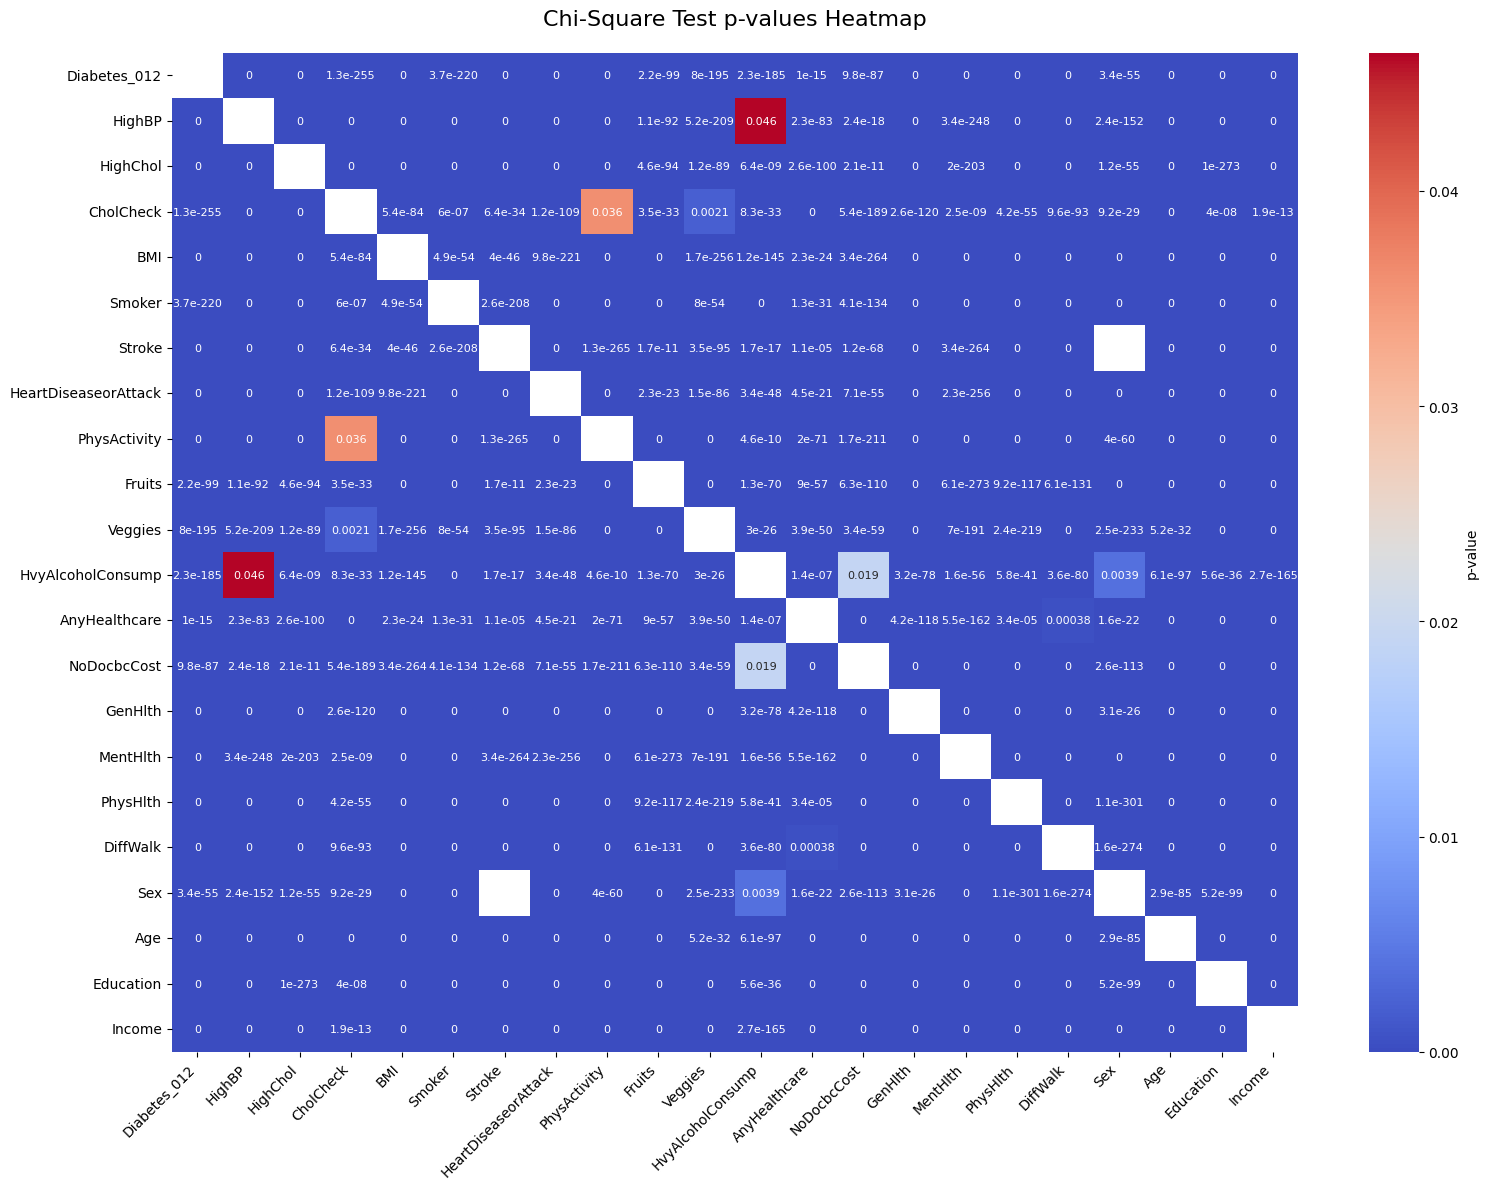

In [42]:
#Run chi square test for all pairs of categorical variables and display only the significant p-values (p=<0.05) in a heatmap
columns = df.columns
p_values = pd.DataFrame(index=columns, columns=columns)

# Perform chi-square test for all pairs of categorical variables
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            p_values.loc[col1, col2] = np.nan  # Skip self-comparison
        else:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform chi-square test
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p

# Convert to numeric for plotting
p_values = p_values.astype(float)

significant = p_values.applymap(lambda x: x if x <= 0.05 else np.nan)

plt.figure(figsize=(16, 12))
sns.heatmap(
    significant, 
    annot=True, 
    fmt=".2g", 
    cmap="coolwarm", 
    cbar_kws={'label': 'p-value'}, 
    annot_kws={"size": 8}
)
plt.title("Chi-Square Test p-values Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

We can conclude that there is a statistically significant association ebtween each pair of feature in the dataset except for between Stroke and Sex. It can therefore be concluded that all health indicators in the dataset have a statistically significant association with the diabetes target variable. 